In [2]:
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt

In [4]:
ecomm_data = "E-Commerce Transactions.csv"
df = pd.read_csv(ecomm_data)

In [8]:
#Creating User and Product Nodes
g = nx.Graph()
users = df['User_Name'].unique()
products = df['Product_Category'].unique()
g.add_nodes_from(users, bipartite=0)  # this is user nodes
g.add_nodes_from(products, bipartite=1) # this is product nodes


In [11]:
#Creating Edges Based on Transactions
for _, row in df.iterrows():
    g.add_edge(row['User_Name'], row['Product_Category'], weight=row['Purchase_Amount'])

degree_centrality = nx.degree_centrality(g)
betweenness_centrality = nx.betweenness_centrality(g)
pagerank = nx.pagerank(g)

In [18]:
important_products = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:3]
important_nodes = [node for node, _ in important_products]

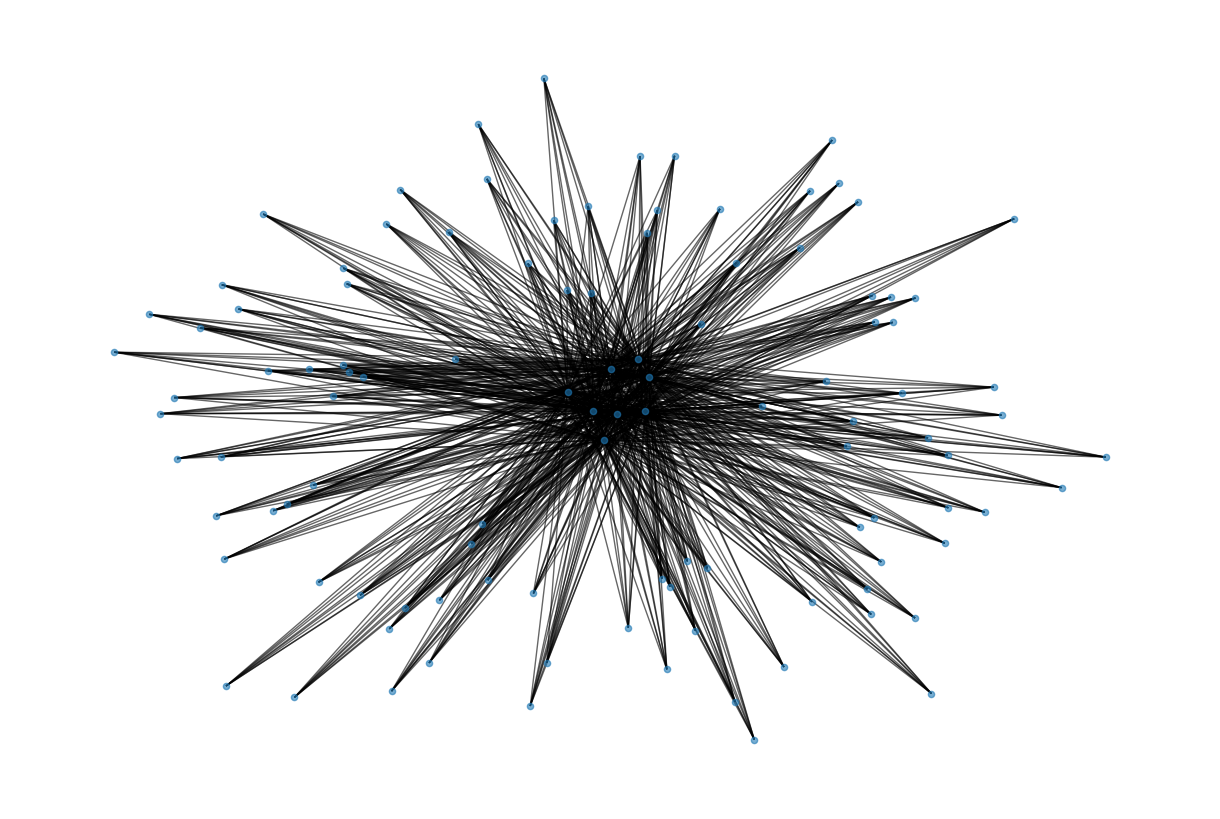

In [13]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(g, seed=42)
nx.draw(g, pos, with_labels=False, node_size=20, alpha=0.6)

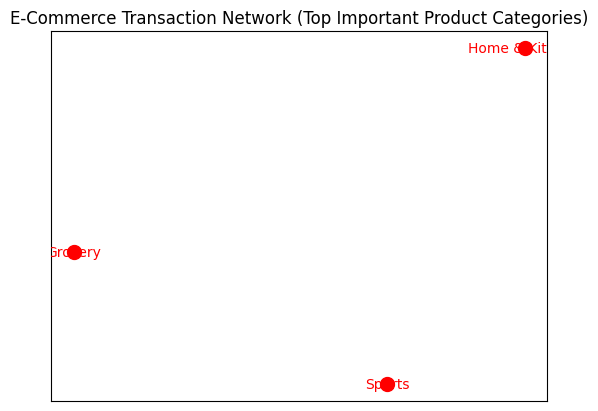

In [15]:
nx.draw_networkx_nodes(g, pos, nodelist=important_nodes, node_color='red', node_size=100)
labels = {node: node for node in important_nodes}
nx.draw_networkx_labels(g, pos, labels, font_size=10, font_color='red')
plt.title("E-Commerce Transaction Network (Top Important Product Categories)")
plt.show()

In [16]:
summary_data = {
    "Product Category": [node for node, _ in important_products],
    "PageRank Score": [score for _, score in important_products],
    "Degree Centrality": [degree_centrality[node] for node, _ in important_products],
    "Betweenness Centrality": [betweenness_centrality[node] for node, _ in important_products],
}

summary_df = pd.DataFrame(summary_data)
print(summary_df)

  Product Category  PageRank Score  Degree Centrality  Betweenness Centrality
0          Grocery        0.062599           0.934579                0.109108
1           Sports        0.062208           0.934579                0.109108
2   Home & Kitchen        0.061650           0.934579                0.109108
